In [7]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# Data paths
train_path = 'dataset/train'  

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.6, 1.4),
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'), 
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Create EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=3,               
    restore_best_weights=True 
)
checkpoint = ModelCheckpoint(
    'mask_detector_modelv5.h5',          
    monitor='val_loss',       
    save_best_only=True,     
    mode='min',               
    verbose=1
)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_data,
    validation_data=val_data,
    callbacks = [early_stop,checkpoint],
    epochs=20
    )

Found 1990 images belonging to 2 classes.
Found 496 images belonging to 2 classes.
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7204 - loss: 0.5316
Epoch 1: val_loss improved from inf to 0.25926, saving model to mask_detector_modelv5.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step - accuracy: 0.7225 - loss: 0.5285 - val_accuracy: 0.9113 - val_loss: 0.2593
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9558 - loss: 0.1450
Epoch 2: val_loss improved from 0.25926 to 0.19128, saving model to mask_detector_modelv5.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step - accuracy: 0.9558 - loss: 0.1450 - val_accuracy: 0.9315 - val_loss: 0.1913
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.9573 - loss: 0.1302
Epoch 3: val_loss did not improve from 0.19128
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.9574 - loss: 0.1299 - val_accuracy: 0.9395 - val_loss: 0.1934
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.9754 - loss: 0.0752
Epoch 4: val_loss did not improve from 0.19128
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step - accuracy: 0.9752 - loss: 0.0755 - val_accuracy: 0.9093 - val_loss: 0.2358
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9720 - loss: 0.0963
Epoch 5: val_loss improved from 0.19128 to 0.15444, saving model to mask_detector_modelv5.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.9720 - loss: 0.0962 - val_accuracy: 0.9476 - val_loss: 0.1544
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9769 - loss: 0.0837
Epoch 6: val_loss did not improve from 0.15444
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.9769 - loss: 0.0834 - val_accuracy: 0.9375 - val_loss: 0.1954
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9752 - loss: 0.0803
Epoch 7: val_loss improved from 0.15444 to 0.11617, saving model to mask_detector_modelv5.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step - accuracy: 0.9753 - loss: 0.0800 - val_accuracy: 0.9637 - val_loss: 0.1162
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9850 - loss: 0.0648
Epoch 8: val_loss did not improve from 0.11617
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - accuracy: 0.9849 - loss: 0.0651 - val_accuracy: 0.9375 - val_loss: 0.1606
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.9760 - loss: 0.0776
Epoch 9: val_loss did not improve from 0.11617
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.9761 - loss: 0.0773 - val_accuracy: 0.9476 - val_loss: 0.1588
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.9790 - loss: 0.0719
Epoch 10: val_loss improved from 0.11617 to 0.10769, saving model to mask_detector_modelv5.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9790 - loss: 0.0718 - val_accuracy: 0.9677 - val_loss: 0.1077
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9825 - loss: 0.0566
Epoch 11: val_loss did not improve from 0.10769
63/63 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9824 - loss: 0.0566 - val_accuracy: 0.9375 - val_loss: 0.1804
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9819 - loss: 0.0557
Epoch 12: val_loss improved from 0.10769 to 0.10750, saving model to mask_detector_modelv5.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 464ms/step - accuracy: 0.9819 - loss: 0.0557 - val_accuracy: 0.9577 - val_loss: 0.1075
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.9907 - loss: 0.0302
Epoch 13: val_loss improved from 0.10750 to 0.08519, saving model to mask_detector_modelv5.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 429ms/step - accuracy: 0.9906 - loss: 0.0303 - val_accuracy: 0.9718 - val_loss: 0.0852
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9837 - loss: 0.0356
Epoch 14: val_loss did not improve from 0.08519
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 408ms/step - accuracy: 0.9837 - loss: 0.0356 - val_accuracy: 0.9496 - val_loss: 0.1661
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.9837 - loss: 0.0622
Epoch 15: val_loss did not improve from 0.08519
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.9837 - loss: 0.0621 - val_accuracy: 0.9577 - val_loss: 0.2005
Epoch 16/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.9933 - loss: 0.0217
Epoch 16: val_loss did not improve from 0.08519
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 420ms/step - accuracy: 0.9933 - loss: 0.0219 - val_accuracy: 0.9657 - val_loss: 0.1368


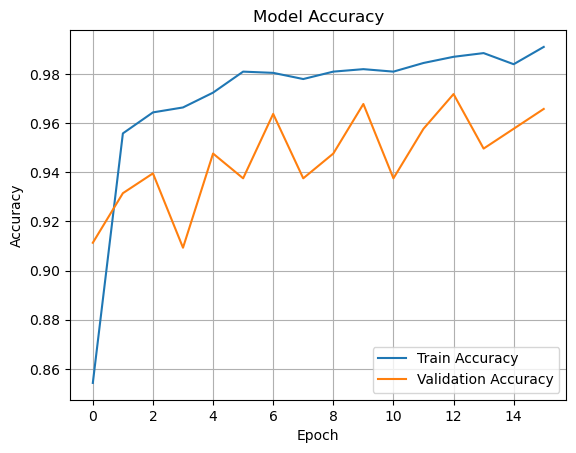

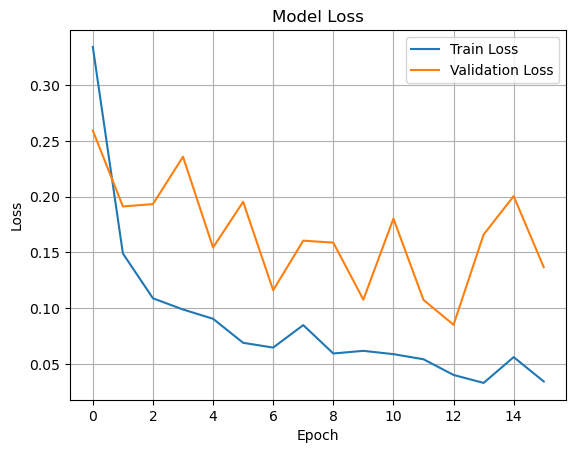

In [8]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
test_path = 'dataset/test'  
test_data = datagen.flow_from_directory(
    test_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)
loss, accuracy = model.evaluate(test_data)
print(f"test Accuracy: {accuracy*100:.2f}%")
print(f"test Loss: {loss:.4f}")

Found 276 images belonging to 2 classes.


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.9729 - loss: 0.0637
test Accuracy: 96.38%
test Loss: 0.0859
